In [ ]:
"""
Given a set of images of different individuals in various poses and with different facial expressions, our task is to classify each person 
independently of their facial expression and head position.

The dataset can be found at the following link: https://archive.ics.uci.edu/dataset/124/cmu+face+images.
It consists of 640 images of people captured with variations in pose (straight, left, right, up), expression (neutral, happy, sad, angry), 
and eye appearance (with or without sunglasses).

"""


In [40]:
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [101]:
# Ruta base donde están las subcarpetas de clases
base_path = 'faces'  # Cambia a tu carpeta base

images = []
labels = []
class_names = os.listdir(base_path) # an2i, an33, ....

# Mapear clases a números
label_map = {class_name: i for i, class_name in enumerate(class_names)}



# Cargar imágenes
for class_name in class_names:
    class_path = os.path.join(base_path, class_name)
    if not os.path.isdir(class_path):
        continue
    for filename in os.listdir(class_path):
        if filename.endswith('.pgm'):
            img_path = os.path.join(class_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Leer en escala de grises
            img = cv2.resize(img, (150, 150))  # Redimensionar
            img = np.stack((img,)*3, axis=-1)  # Convertir a 3 canales
            img = img.astype('float32') / 255.0  # Normalizar
            images.append(img)
            labels.append(label_map[class_name])

# Convertir a NumPy arrays
X = np.array(images)
y = np.array(labels)


# División entrenamiento / validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2**31 - 1)

print(f"Number of images: {len(X)}")
print(f"Detected Classes: {label_map}")
print(f"X_train shape: {X_train.shape}, y_train: {y_train.shape}")

Total de imágenes: 1872
Clases detectadas: {'an2i': 0, 'at33': 1, 'boland': 2, 'bpm': 3, 'ch4f': 4, 'cheyer': 5, 'choon': 6, 'danieln': 7, 'glickman': 8, 'karyadi': 9, 'kawamura': 10, 'kk49': 11, 'megak': 12, 'mitchell': 13, 'night': 14, 'phoebe': 15, 'saavik': 16, 'steffi': 17, 'sz24': 18, 'tammo': 19}
Forma de X_train: (1497, 150, 150, 3), y_train: (1497,)


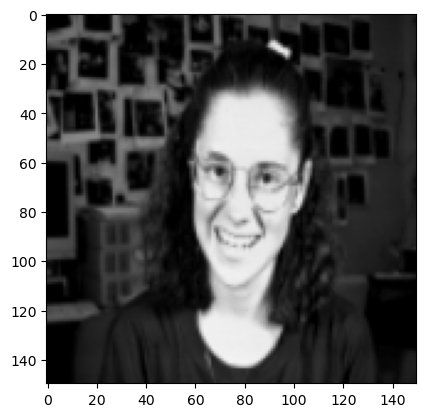

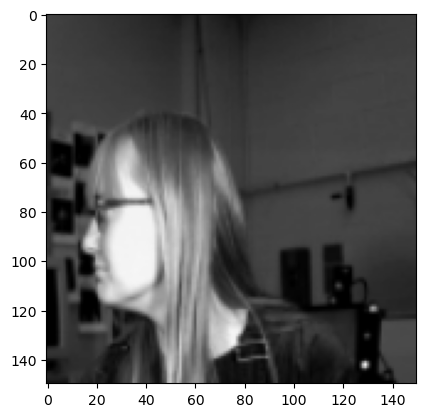

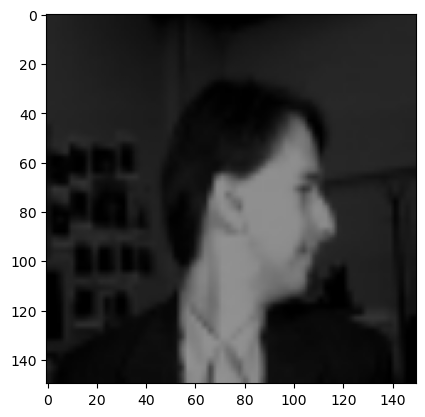

In [102]:
for i in range(3):
    rd_idx = np.random.randint(1, X.shape[0])
    im = X[rd_idx]
    plt.imshow(im, cmap=mpl.cm.binary)
    plt.show()

In [81]:
# MODEL DECLARATION

In [103]:
model = models.Sequential([
layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(128, (3, 3), activation='relu'),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(512, activation='relu'),
layers.Dense(len(class_names), activation='softmax') # Salida (-1,0,1) = (NEGTIVA, NEUTRAL, POSITIVA)
])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

C:\Users\MARIA\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 20)                  │          10,260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,043,924 (72.65 MB)

 Trainable params: 19,043,924 (72.65 MB)

 Non-trainable params: 0 (0.00 B)

Entrenando con Adam...
Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 513ms/step - accuracy: 0.5296 - loss: 1.7144
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 505ms/step - accuracy: 0.9901 - loss: 0.0294
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 501ms/step - accuracy: 1.0000 - loss: 1.4159e-04
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 501ms/step - accuracy: 1.0000 - loss: 4.2727e-05
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 503ms/step - accuracy: 1.0000 - loss: 3.7222e-05
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 494ms/step - accuracy: 1.0000 - loss: 2.2512e-05
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 514ms/step - accuracy: 1.0000 - loss: 1.7611e-05
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 499ms/step - accuracy: 1.0000 - loss: 1.2769e-05
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 502ms/step - accuracy: 1.0000 - loss: 1.0278e-05
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 528ms/step - accuracy: 1.0000 - loss: 9.3084e-06


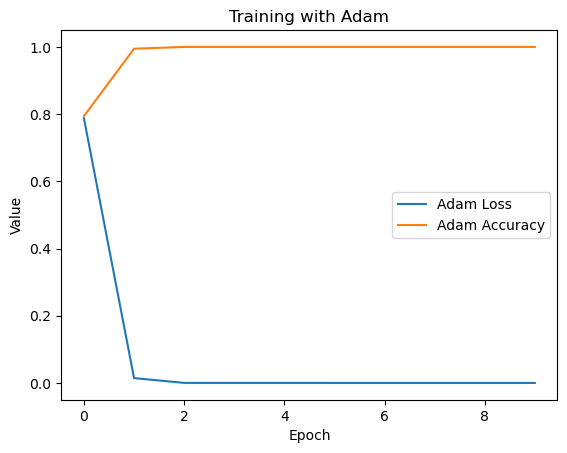

Entrenando con SGD...
Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 387ms/step - accuracy: 1.0000 - loss: 6.1015e-06
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 371ms/step - accuracy: 1.0000 - loss: 5.4702e-06
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 404ms/step - accuracy: 1.0000 - loss: 7.8730e-06
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 372ms/step - accuracy: 1.0000 - loss: 5.9018e-06
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 397ms/step - accuracy: 1.0000 - loss: 5.5339e-06
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 384ms/step - accuracy: 1.0000 - loss: 9.3254e-06
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 446ms/step - accuracy: 1.0000 - loss: 5.1815e-06
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 368ms/step - accuracy: 1.0000 - loss: 7.7291e-06
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 383ms/step - accuracy: 1.0000 - loss: 5.0766e-06
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 366ms/step - accuracy: 1.0000 - loss: 6.7383e-06


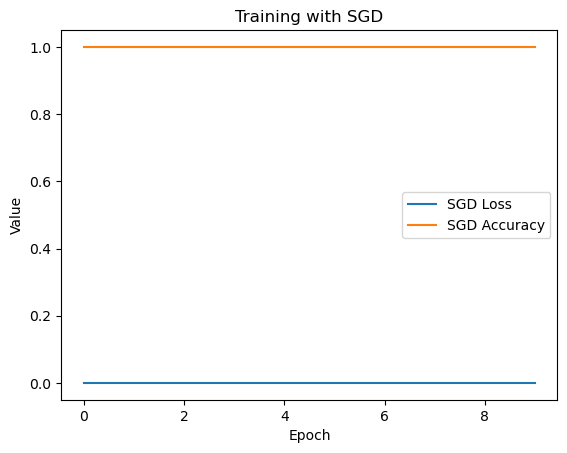

Entrenando con RMSprop...
Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 470ms/step - accuracy: 1.0000 - loss: 3.2050e-06
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 491ms/step - accuracy: 1.0000 - loss: 1.1382e-06
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 482ms/step - accuracy: 1.0000 - loss: 1.1279e-06
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 537ms/step - accuracy: 1.0000 - loss: 8.3970e-07
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 536ms/step - accuracy: 1.0000 - loss: 6.8582e-07
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 481ms/step - accuracy: 1.0000 - loss: 8.1153e-07
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 487ms/step - accuracy: 1.0000 - loss: 6.0522e-07
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 459ms/step - accuracy: 1.0000 - loss: 4.7601e-07
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 23s 479ms/step - accuracy: 1.0000 - loss: 5.6509e-07
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 473ms/step - accuracy: 1.0000 - loss: 6.0081e-07


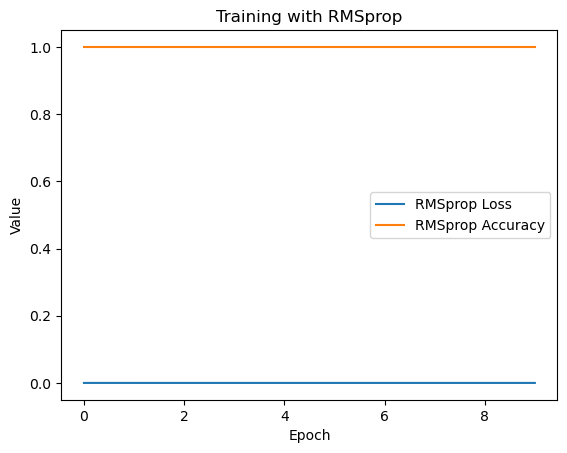

In [104]:
optimizers = {
    'Adam': tf.keras.optimizers.Adam(),
    'SGD': tf.keras.optimizers.SGD(),
    'RMSprop': tf.keras.optimizers.RMSprop()
}

def train_model_with_optimizer(optimizer, epochs=10):
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    )

    return history

for opt_name, optimizer in optimizers.items():
    print(f"Entrenando con {opt_name}...")
    history = train_model_with_optimizer(optimizer)

    plt.plot(history.history['loss'], label=f'{opt_name} Loss')
    plt.plot(history.history['accuracy'], label=f'{opt_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title(f'Training with {opt_name}')
    plt.legend()
    plt.show()

In [105]:
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Pérdida (loss): {loss:.4f}")
print(f"Precisión (accuracy): {accuracy:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9923 - loss: 0.0176
Pérdida (loss): 0.0071
Precisión (accuracy): 0.9973


In [106]:
predictions = model.predict(X_val)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


In [110]:
predicted_classes = np.argmax(predictions, axis=1)


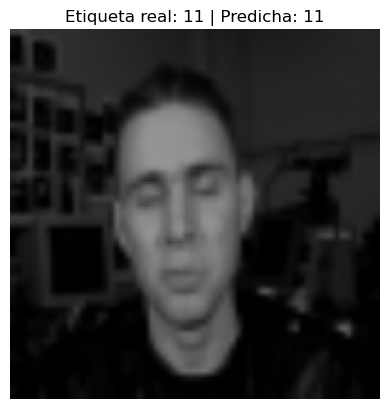

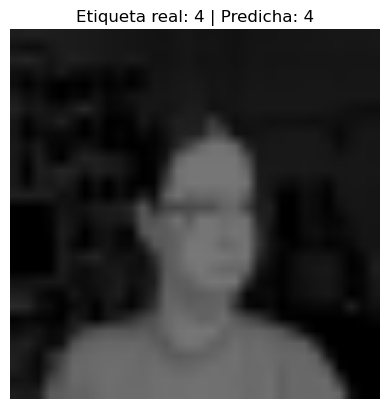

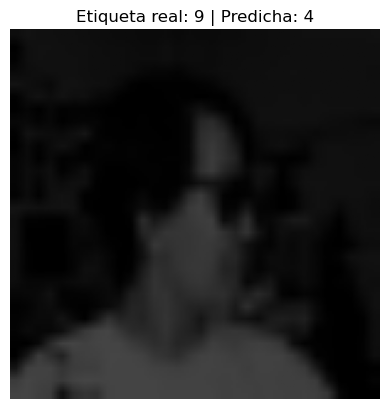

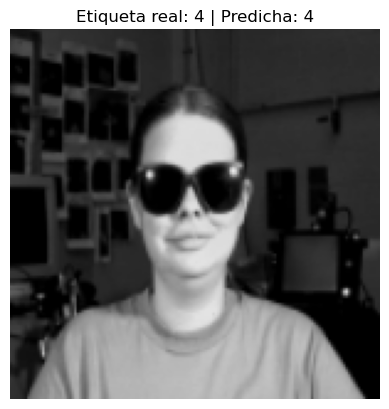

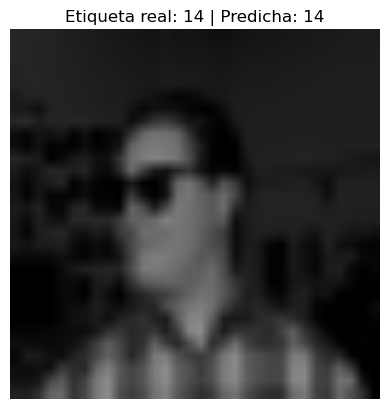

In [108]:
for i in range(5):
    plt.imshow(X_val[i].astype("float32"))
    plt.title(f"Etiqueta real: {y_val[i]} | Predicha: {predicted_classes[i]}")
    plt.axis('off')
    plt.show()

In [109]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val, predicted_classes))

[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 25  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 24  0  0